In [168]:
import pandas as pd

In [169]:
df=pd.read_csv('AAPL.csv')

In [170]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [171]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [172]:
df1=df.reset_index()['close']

In [173]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

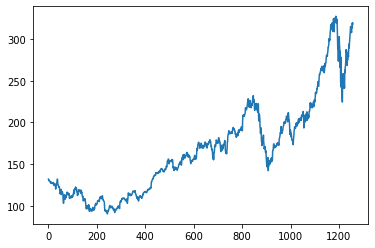

In [174]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [175]:
import numpy as np

In [176]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [177]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [178]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [179]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [180]:
training_size,test_size

(817, 441)

In [181]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [182]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [183]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [184]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [185]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [186]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [187]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional

In [188]:
# from keras.optimizers import RMSprop
# 
# from keras.optimizers import RMSprop
# def bidirectional_model(learn_rate):
#     model = Sequential()
#     model.add(Bidirectional(LSTM(50),input_shape=(100,1)))
#     model.add(Dense(1))
#     optimizer = RMSprop(lr=learn_rate)
#     model.compile(loss='mean_squared_error', optimizer=optimizer)
#     return model

# def fixed_model(learn_rate):
#     model = Sequential()
#     model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
#     model.add(Dense(1))
#     optimizer = RMSprop(lr=learn_rate)
#     model.compile(loss='mean_squared_error', optimizer=optimizer)
#     return model
# def stacked_model(learn_rate):
#     model = Sequential()
#     model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
#     model.add(LSTM(50))
#     model.add(Dense(1))
#     optimizer = RMSprop(lr=learn_rate)
#     model.compile(loss='mean_squared_error', optimizer=optimizer)
#     return model









In [189]:
from keras.optimizers import RMSprop
def bidirectional_model(learn_rate):
    model = Sequential()
    model.add(Bidirectional(LSTM(50),input_shape=(100,1)))
    model.add(Dense(1))
    optimizer = RMSprop(lr=learn_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model


def stacked_model(learn_rate):
    model = Sequential()
    model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
    model.add(LSTM(50))
    model.add(Dense(1))
    optimizer = RMSprop(lr=learn_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [190]:
# model=fixed_model(0.001)
# model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dense_11 (Dense)            (None, 100, 1)            51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


C:\Users\Aviral\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [191]:
#Eshan stacked

# from keras.optimizers import RMSprop
# model = Sequential()
# model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
# model.add(LSTM(50))
# model.add(Dense(1))
# optimizer = RMSprop(lr=0.001)
# model.compile(loss='mean_squared_error', optimizer=optimizer)


In [192]:
#Krish Naik

# model=Sequential()
# model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
# model.add(LSTM(50,return_sequences=True))
# model.add(LSTM(50))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error',optimizer='adam')

In [193]:
models =[]
# models.append(("Fixed",fixed_model))
models.append(("Bidirectional",bidirectional_model))
models.append(("Stacked",stacked_model))

In [194]:
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error
learn_rates = [0.01,0.001,0.0001]
c=10000
learn_rate=0
model_name=""
for model_item in models:
    for lr in learn_rates:
        model = model_item[1](lr)
        model.summary()
        model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

        train_predict=model.predict(X_train)
        test_predict=model.predict(X_test)
        train_predict=scaler.inverse_transform(train_predict)
        test_predict=scaler.inverse_transform(test_predict)
        if(c>math.sqrt(mean_squared_error(y_train,train_predict))):
            c=math.sqrt(mean_squared_error(y_train,train_predict))
            learn_rate=lr
            model_name=model_item[0]

print("Best Model for AAPL is ".format(model_name))
print("Best learning rate is {}".format(learn_rate))
print("Minimum mean squared error is {}".format(c))
        

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 100)              20800     
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
12/12 [==============================] - 4s 102ms/step - loss: 0.5804 - val_loss: 0.0701
Epoch 2/100
12/12 [==============================] - 1s 48ms/step - loss: 0.0034 - val_loss: 0.0250
Epoch 3/100
12/12 [==============================] - 1s 48ms/step - loss: 0.0024 - val_loss: 0.0063
Epoch 4/100
12/12 [==============================] - 1s 49ms/step - loss: 0.00

C:\Users\Aviral\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 4s 136ms/step - loss: 0.0078 - val_loss: 0.0111
Epoch 2/100
12/12 [==============================] - 1s 81ms/step - loss: 0.0014 - val_loss: 0.0200
Epoch 3/100
12/12 [==============================] - 1s 80ms/step - loss: 0.0010 - val_loss: 0.0071
Epoch 4/100
12/12 [==============================] - 1s 80ms/step - loss: 0.0011 - val_loss: 0.0117
Epoch 5/100
12/12 [==============================] - 1s 80ms/step - loss: 8.3949e-04 - val_loss: 0.0042
Epoch 6/100
12/12 [==============================] - 1s 79ms/step - loss: 0.0011 - val_loss: 0.0029
Epoch 7/100
12/12 [==============================] - 1s 86ms/step - loss: 7.5724e-04 - val_loss: 0.0028
Epoch 8/100
12/12 [==============================] - 1s 87ms/step - loss: 8.5864e-04 - val_loss: 0.0048
Epoch 9/100
12/12 [==============================] - 1s 88ms/step - loss: 7.4416e-04 - val_loss: 0.0075
Epoch 10/100
12/12 [==============================] - 1s 85ms/step - loss: 6.5307e-04 - val_los

C:\Users\Aviral\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 4s 108ms/step - loss: 0.0711 - val_loss: 0.4303
Epoch 2/100
12/12 [==============================] - 1s 60ms/step - loss: 0.0512 - val_loss: 0.3479
Epoch 3/100
12/12 [==============================] - 1s 66ms/step - loss: 0.0381 - val_loss: 0.2747
Epoch 4/100
12/12 [==============================] - 1s 69ms/step - loss: 0.0272 - val_loss: 0.2094
Epoch 5/100
12/12 [==============================] - 1s 70ms/step - loss: 0.0185 - val_loss: 0.1527
Epoch 6/100
12/12 [==============================] - 1s 77ms/step - loss: 0.0119 - val_loss: 0.1033
Epoch 7/100
12/12 [==============================] - 1s 70ms/step - loss: 0.0078 - val_loss: 0.0666
Epoch 8/100
12/12 [==============================] - 1s 67ms/step - loss: 0.0058 - val_loss: 0.0462
Epoch 9/100
12/12 [==============================] - 1s 68ms/step - loss: 0.0046 - val_loss: 0.0323
Epoch 10/100
12/12 [==============================] - 1s 67ms/step - loss: 0.0035 - val_loss: 0.0224
Epoch 11/1

C:\Users\Aviral\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 4s 141ms/step - loss: 0.4973 - val_loss: 0.0649
Epoch 2/100
12/12 [==============================] - 1s 102ms/step - loss: 0.0073 - val_loss: 0.0383
Epoch 3/100
12/12 [==============================] - 1s 100ms/step - loss: 0.0054 - val_loss: 0.0317
Epoch 4/100
12/12 [==============================] - 1s 97ms/step - loss: 0.0087 - val_loss: 0.0038
Epoch 5/100
12/12 [==============================] - 1s 99ms/step - loss: 0.0055 - val_loss: 0.0061
Epoch 6/100
12/12 [==============================] - 1s 100ms/step - loss: 0.0063 - val_loss: 0.0037
Epoch 7/100
12/12 [==============================] - 1s 99ms/step - loss: 0.0053 - val_loss: 0.0040
Epoch 8/100
12/12 [==============================] - 1s 97ms/step - loss: 0.0097 - val_loss: 0.0062
Epoch 9/100
12/12 [==============================] - 1s 95ms/step - loss: 0.0027 - val_loss: 0.0308
Epoch 10/100
12/12 [==============================] - 1s 98ms/step - loss: 0.0042 - val_loss: 0.0847
Epoch 1

C:\Users\Aviral\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 5s 188ms/step - loss: 0.0064 - val_loss: 0.0053
Epoch 2/100
12/12 [==============================] - 2s 133ms/step - loss: 9.1200e-04 - val_loss: 0.0037
Epoch 3/100
12/12 [==============================] - 2s 144ms/step - loss: 0.0015 - val_loss: 0.0053
Epoch 4/100
12/12 [==============================] - 2s 155ms/step - loss: 9.6176e-04 - val_loss: 0.0032
Epoch 5/100
12/12 [==============================] - 2s 154ms/step - loss: 0.0011 - val_loss: 0.0027
Epoch 6/100
12/12 [==============================] - 2s 154ms/step - loss: 7.1975e-04 - val_loss: 0.0029
Epoch 7/100
12/12 [==============================] - 2s 153ms/step - loss: 9.6116e-04 - val_loss: 0.0104
Epoch 8/100
12/12 [==============================] - 2s 152ms/step - loss: 6.2497e-04 - val_loss: 0.0055
Epoch 9/100
12/12 [==============================] - 2s 152ms/step - loss: 9.3755e-04 - val_loss: 0.0069
Epoch 10/100
12/12 [==============================] - 2s 153ms/step - loss: 7.3

C:\Users\Aviral\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 4s 167ms/step - loss: 0.0504 - val_loss: 0.2951
Epoch 2/100
12/12 [==============================] - 2s 128ms/step - loss: 0.0334 - val_loss: 0.2146
Epoch 3/100
12/12 [==============================] - 2s 131ms/step - loss: 0.0211 - val_loss: 0.1390
Epoch 4/100
12/12 [==============================] - 2s 134ms/step - loss: 0.0111 - val_loss: 0.0733
Epoch 5/100
12/12 [==============================] - 2s 137ms/step - loss: 0.0052 - val_loss: 0.0303
Epoch 6/100
12/12 [==============================] - 2s 132ms/step - loss: 0.0031 - val_loss: 0.0118
Epoch 7/100
12/12 [==============================] - 2s 131ms/step - loss: 0.0022 - val_loss: 0.0055
Epoch 8/100
12/12 [==============================] - 2s 132ms/step - loss: 0.0014 - val_loss: 0.0039
Epoch 9/100
12/12 [==============================] - 2s 133ms/step - loss: 8.6960e-04 - val_loss: 0.0045
Epoch 10/100
12/12 [==============================] - 2s 131ms/step - loss: 6.4522e-04 - val_loss: 

In [197]:
print(model_name)

Stacked


In [195]:


model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_22 (LSTM)              (None, 50)                20200     
                                                                 
 dense_17 (Dense)            (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [196]:
#model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 126ms/step - loss: 2.6566e-04 - val_loss: 0.0012
Epoch 2/100
12/12 [==============================] - 1s 121ms/step - loss: 2.7708e-04 - val_loss: 0.0011
Epoch 3/100
12/12 [==============================] - 2s 131ms/step - loss: 2.8183e-04 - val_loss: 0.0017
Epoch 4/100
12/12 [==============================] - 2s 145ms/step - loss: 2.7640e-04 - val_loss: 0.0014
Epoch 5/100
12/12 [==============================] - 2s 151ms/step - loss: 2.5943e-04 - val_loss: 0.0017
Epoch 6/100
12/12 [==============================] - 2s 167ms/step - loss: 2.6442e-04 - val_loss: 0.0011
Epoch 7/100
12/12 [==============================] - 2s 180ms/step - loss: 2.7579e-04 - val_loss: 0.0014
Epoch 8/100
12/12 [==============================] - 2s 147ms/step - loss: 2.5781e-04 - val_loss: 0.0021
Epoch 9/100
12/12 [==============================] - 2s 139ms/step - loss: 2.7738e-04 - val_loss: 0.0012
Epoch 10/100
12/12 [==============================] - 2

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.10.0'

In [200]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 19ms/step


In [201]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [202]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

142.19215869758025

In [203]:
math.sqrt(mean_squared_error(ytest,test_predict))

235.51101247487108

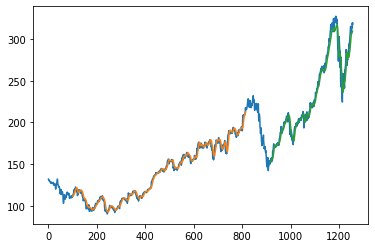

In [204]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()